In [1]:
import pandas as pd

# Load the dataset
file_path = "fake_news_v0.1.csv"  # Change this if needed
df = pd.read_csv(file_path)

# Print the total number of rows and columns
print(f"Total Rows: {df.shape[0]}, Total Columns: {df.shape[1]}")

# Display first few rows
df.head()


Total Rows: 12999, Total Columns: 20


,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Govt Be...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Govt Be...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State :\nFox News Sunday reported this mor...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


In [8]:
import pandas as pd
from datetime import datetime

# Load the dataset
df = pd.read_csv("fake_news_v0.1.csv")

# Define the expected full date format
expected_format = "%Y-%m-%dT%H:%M:%S.%f%z"

# Function to check if a date is valid and complete
def is_valid_complete_date(date_str):
    if pd.isna(date_str) or str(date_str).strip().lower() in ["", "nan"]:
        return "null"  # Missing value

    try:
        datetime.strptime(date_str, expected_format)
        return "valid"
    except ValueError:
        if len(date_str) < 19:  # Length check to detect missing time components
            return "incomplete"
        return "incorrect"  # Wrong format or logically invalid date

# Check for missing (NaN) values first
null_published = df["published"].isna().sum()
null_crawled = df["crawled"].isna().sum()

# Apply the function to 'published' and 'crawled' columns
df["published_status"] = df["published"].astype(str).apply(is_valid_complete_date)
df["crawled_status"] = df["crawled"].astype(str).apply(is_valid_complete_date)

# Count issues in each column
published_counts = df["published_status"].value_counts()
crawled_counts = df["crawled_status"].value_counts()

# Print results
print(f"Null values in 'published' column: {null_published}")
print(f"Null values in 'crawled' column: {null_crawled}")
print("\nPublished Column Issues:")
print(published_counts)

print("\nCrawled Column Issues:")
print(crawled_counts)


Null values in 'published' column: 0
Null values in 'crawled' column: 0

Published Column Issues:
published_status
valid         12963
incomplete       25
incorrect        11
Name: count, dtype: int64

Crawled Column Issues:
crawled_status
valid    12999
Name: count, dtype: int64


Null values in 'published' column: 0
Null values in 'crawled' column: 0

Published Column Issues:
published_status
valid        12963
incorrect       36
Name: count, dtype: int64

Crawled Column Issues:
crawled_status
valid    12999
Name: count, dtype: int64
Some invalid 'published' dates before fixing:
                                          uuid  ord_in_thread  \
248   5fccb20a0257e0d9fd1e1df51d43352f73288fdd              0   
1248  2406bd397c8dfc78af4ec94a492e7d87ff8e9554              0   
1696  48965dc88927836fbec5b97d7318178f0f9909ba              0   
1769  3ff8858a956f846c57d5d08f33553d8ed9b0e786              0   
1828  d534702cc7c4c3e5728a89420c57c691e40a71bb              0   

                                                 author  \
248                                               JinMI   
1248                        Nellie Bailey and Glen Ford   
1696  11 Things To Let Go Of Before The New Year Mot...   
1769                                    John Falkenberg   
1828     

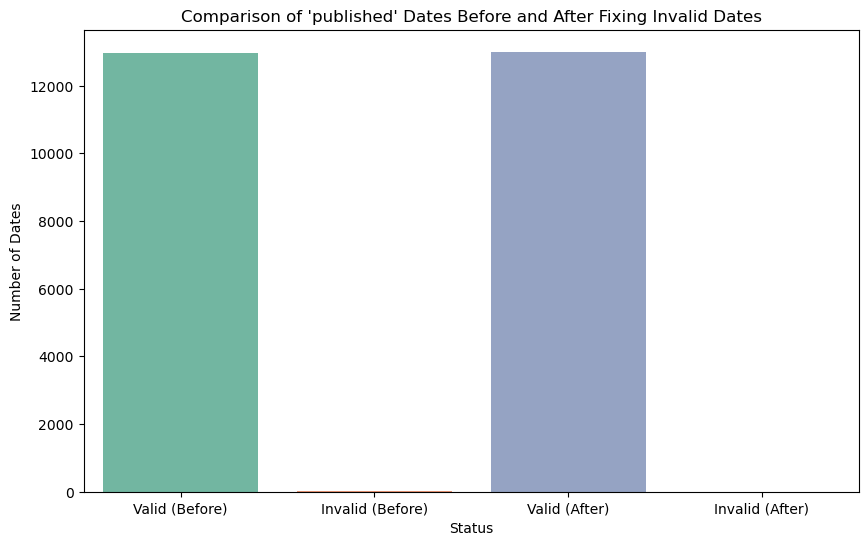

In [13]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("fake_news_v0.1.csv")

# Define the expected full date format
expected_format = "%Y-%m-%dT%H:%M:%S.%f%z"

# Function to check if a date is valid and complete with relaxed validation
def is_valid_date(date_str):
    if pd.isna(date_str) or str(date_str).strip().lower() in ["", "nan"]:
        return "null"  # Missing value

    try:
        # Try parsing with the full format first
        datetime.strptime(date_str, "%Y-%m-%dT%H:%M:%S.%f%z")
        return "valid"
    except ValueError:
        try:
            # Allow for missing fractions of seconds
            datetime.strptime(date_str, "%Y-%m-%dT%H:%M:%S%z")
            return "valid"
        except ValueError:
            # If it's still invalid, it's incorrect
            return "incorrect"

# Check for missing (NaN) values first
null_published = df["published"].isna().sum()
null_crawled = df["crawled"].isna().sum()

# Apply the function to 'published' and 'crawled' columns
df["published_status"] = df["published"].astype(str).apply(is_valid_date)
df["crawled_status"] = df["crawled"].astype(str).apply(is_valid_date)

# Count issues in each column
published_counts = df["published_status"].value_counts()
crawled_counts = df["crawled_status"].value_counts()

# Print results
print(f"Null values in 'published' column: {null_published}")
print(f"Null values in 'crawled' column: {null_crawled}")
print("\nPublished Column Issues:")
print(published_counts)

print("\nCrawled Column Issues:")
print(crawled_counts)

# Count the number of valid and invalid dates before fixing
valid_before = df['published'].astype(str).apply(is_valid_date).apply(lambda x: x == "valid").sum()  # Count valid entries
invalid_before = len(df) - valid_before  # Total rows minus valid ones

# Print some invalid dates for debugging (if any exist)
invalid_examples = df[~df['published'].astype(str).apply(is_valid_date).apply(lambda x: x == "valid")].head(5)
print(f"Some invalid 'published' dates before fixing:")
print(invalid_examples)

# Print counts before fixing
print(f"\nBefore fixing:")
print(f"Valid dates: {valid_before}")
print(f"Invalid dates: {invalid_before}")

# Find the most common valid date (mode) and replace invalid ones
valid_dates = df[df['published'].astype(str).apply(is_valid_date).apply(lambda x: x == "valid")]['published']
mode_date = valid_dates.mode()[0]
df.loc[~df['published'].astype(str).apply(is_valid_date).apply(lambda x: x == "valid"), 'published'] = mode_date

# Count the number of valid and invalid dates after fixing
valid_after = df['published'].astype(str).apply(is_valid_date).apply(lambda x: x == "valid").sum()
invalid_after = len(df) - valid_after

# Print counts after fixing
print(f"\nAfter fixing:")
print(f"Valid dates: {valid_after}")
print(f"Invalid dates: {invalid_after}")

# Create a DataFrame for visualization
status_data = {
    'Status': ['Valid (Before)', 'Invalid (Before)', 'Valid (After)', 'Invalid (After)'],
    'Count': [valid_before, invalid_before, valid_after, invalid_after]
}

status_df = pd.DataFrame(status_data)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Status', y='Count', data=status_df, palette='Set2')
plt.title("Comparison of 'published' Dates Before and After Fixing Invalid Dates")
plt.ylabel('Number of Dates')
plt.show()


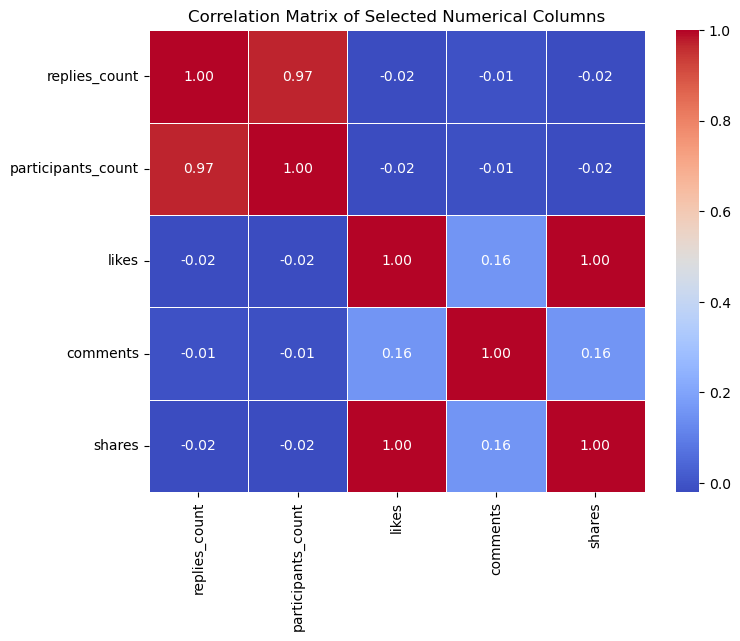

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for correlation matrix
numeric_cols = ['replies_count', 'participants_count', 'likes', 'comments', 'shares']

# Compute correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Selected Numerical Columns")
plt.show()


In [4]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("fake_news_v0.1.csv")

# Convert empty strings to NaN in 'language' and 'author' columns
df['language'].replace("", np.nan, inplace=True)
df['author'].replace("", np.nan, inplace=True)

# Check for null and empty values in 'language' and 'author' columns
null_language = df['language'].isna().sum()
null_author = df['author'].isna().sum()

print(f"Missing 'language' values (including empty): {null_language}")
print(f"Missing 'author' values (including empty): {null_author}")

# Apply imputation technique: Replace missing 'author' values with the mode
if null_author > 0:  # Only impute if there are missing values
    mode_author = df['author'].mode()[0]
    df['author'].fillna(mode_author, inplace=True)

# Verify missing values are replaced
remaining_author = df['author'].isna().sum()
print(f"Remaining missing 'author' values: {remaining_author}")







Missing 'language' values (including empty): 0
Missing 'author' values (including empty): 2467
Remaining missing 'author' values: 0
